In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

train_path = '/home/gsalesm/deeper-thoughts/titanic/data/train.csv'
df_train = pd.read_csv(train_path)

In [2]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Nota-se que há muitos dados faltantes em age e cabin que precisam ser tratados.
# Vamos trazer os dados faltantes de age para a mediana e excluir a variável cabin.

In [4]:
df_train = df_train.drop(labels='Cabin', axis=1)

In [5]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

<AxesSubplot:>

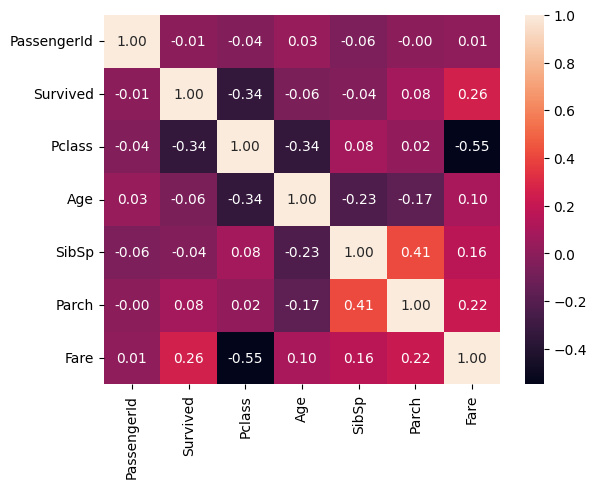

In [6]:
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')

In [7]:
## Como sex não é uma variável numérica, não aparece na correlação. Ver como substituir por 0 ou 1.

In [8]:
df_train['Sex'] = df_train['Sex'].replace(to_replace=['male','female'],value=[0,1])

<AxesSubplot:>

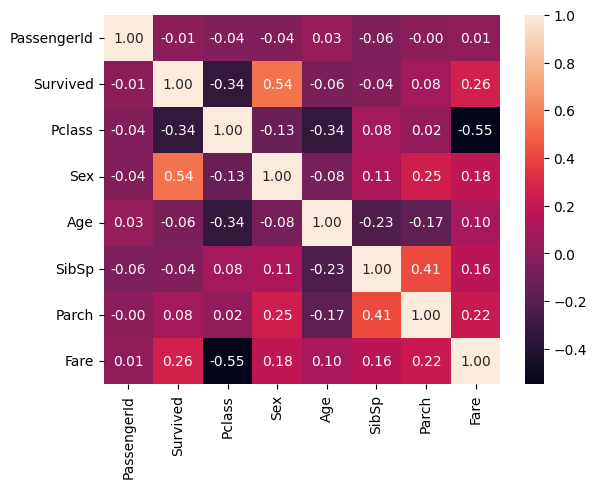

In [9]:
sns.heatmap(df_train.corr(),annot=True,fmt='.2f')

In [10]:
# Olha a correlação altíssima entre sexo e sobrevivência. Vamos fazer uma regressão linear múltipla com x = [Sex, Pclass, Fare] e y = Survived
# Modelo: Survived = a0 + a1*Sex + a2*Pclass + a3*Fare + e

In [11]:
from sklearn import linear_model
from sklearn import metrics

In [12]:
# Separando as variáveis

y = df_train['Survived']
x = df_train[['Sex', 'Pclass', 'Fare']]

In [13]:
# Criando o modelo de regressão linear múltipla

mlr = linear_model.LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [14]:
print(mlr.intercept_)
print(mlr.coef_)

0.5440583659818903
[ 5.14087844e-01 -1.50973930e-01  2.22129981e-04]


In [15]:
# Survived = 0.544 + 0.514*Sex - 0.151*Pclass + 0.000222*Fare

output = mlr.predict(x)
df_output = pd.DataFrame(output, columns=['Predict'])
df_train.insert(0,'Prediction',df_output)

In [16]:
df_delta = None
prediction = df_train['Prediction'].tolist()
survived = df_train['Survived'].tolist()

<AxesSubplot:>

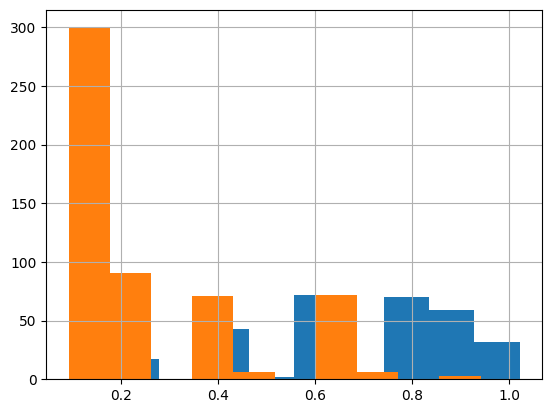

In [17]:
df_delta = pd.DataFrame(data=zip(prediction,survived),columns = ['Prediction','Survived'])
df_delta[df_delta['Survived'] == 1]['Prediction'].hist()
df_delta[df_delta['Survived'] == 0]['Prediction'].hist()

In [18]:
# O modelo linear indica que com y > 0.38 as pessoas morrem (olhei a tabela e fui com base no histograma)

predicted = []
for i in prediction:
    if i > 0.38:
        predicted.append(1)
    else:
        predicted.append(0)
        
predicted

[0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,


In [19]:
# Verificando taxa de acerto do treinamento

check = []
for a,b in zip(survived,predicted):
    if a == b:
        check.append(1)
    else:
        check.append(0)

error_rate = 1 - sum(check)/len(check)
error_rate

0.24915824915824913

In [20]:
# Good enough, but it seems like the relationship between variables is quite far from linear
# Now it's time to apply the model in the test data

test_path = '/home/gsalesm/deeper-thoughts/titanic/data/test.csv'
df_test = pd.read_csv(test_path)

In [21]:
df_test['Sex'] = df_test['Sex'].replace(to_replace=['male','female'],value=[0,1])
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [28]:
x_test = df_test[['Sex','Pclass','Fare']]
y_test = mlr.predict(x_test)

threshold = 0.38 # based on histogram
y_test_prediction = []
for i in y_test:
    if i > 0.38:
        y_test_prediction.append(1)
    else:
        y_test_prediction.append(0)

y_test_prediction
df_result = pd.DataFrame(data=df_test[['PassengerId']])
df_result.insert(1,'Survived',y_test_prediction)

save_path = '/home/gsalesm/deeper-thoughts/titanic/data/result.csv'

df_result.to_csv(save_path,index=False)